In [3]:
# Ramon Ulloa
import sys # modules in sys.path directories's are all available for import
sys.path.append('./DevelopedMethods')
from preprocessing import * # import our pre-processed dataset + imports.py (np, pd, df, df_train, X_train_balanced etc.)

In [4]:
#Instantiating DecisionTreeClassifier object
ccfd_decisiontree = DecisionTreeClassifier()

#Training the model
ccfd_decisiontree.fit(X_train_balanced, y_train_balanced)

#Using newly trained model with X_test_balanced to predict for Credit Card Fraud
decisiontree_prediction = ccfd_decisiontree.predict(X_test_balanced)

#Evaluating accuracy of model by comparing predicted labels with y_test values (actual)
score_dt = metrics.accuracy_score(y_test_balanced, decisiontree_prediction)

#Displaying final accuracy score
"Accuracy Score: ", score_dt

('Accuracy Score: ', 0.9849899441206224)

# ROC / AUC

Area Under Curve:  0.9610356523403298


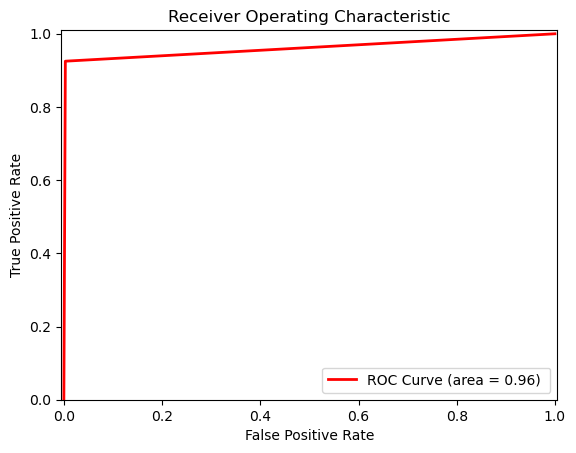

In [7]:
#Estimating the probability of Credit Card Fraud Label
decisiontree_prediction_probability = ccfd_decisiontree.predict_proba(X_test_balanced)

#Calculating true positive rate(tpr) and false positive rate(fpr)
dt_fpr, dt_tpr, dt_thresholds = metrics.roc_curve(y_test_balanced, decisiontree_prediction_probability[:,1], pos_label=1)

#Calculating Area Under Curve
dt_AUC = metrics.auc(dt_fpr, dt_tpr)
print("Area Under Curve: ", dt_AUC)

#Plotting graph for ROC Curve
plt.figure()
plt.plot(fdt_pr, dt_tpr, color='red', lw=2, label='ROC Curve (area = %0.2f) ' % dt_AUC)

#Defining range of x and y axes
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

#Defining labels, title and legend for graph
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right');

# Decision Tree Feature Importance Analysis

                   feature  importance
2                      amt    0.708768
25    category_grocery_pos    0.068402
23  category_gas_transport    0.023988
19                    hour    0.023969
13                     dob    0.022158


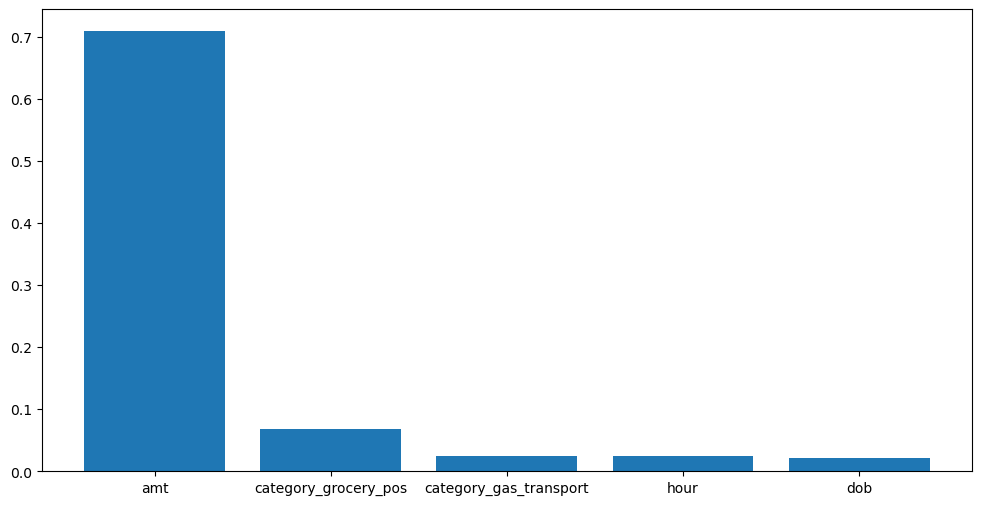

In [9]:
#Creating a new DataFrame object to hold the name of the feature as well as its corresponding feature importance value 
df_feature_importance = pd.DataFrame({'feature': X_train_balanced.columns, 'importance': ccfd_decisiontree.feature_importances_})

#Sorting the dataframe in descending order by feature importance value and printing out the head of the dataframe
feature_importance_sorted = df_feature_importance.sort_values(by='importance', ascending=False).head()
print(feature_importance_sorted.head())

#Plotting bar graph of the dataframet to visually display most important features
plt.figure(figsize=(12,6))
plt.bar(feature_importance_sorted['feature'], feature_importance_sorted['importance'])
plt.show()

# PCA (Principal Component Analysis) - an unsupervised dimensionality reduction

In [11]:
pca = PCA(n_components = 10)
X_Train_pca = pca.fit_transform(X_train_balanced)
X_Test_pca = pca.transform(X_test_balanced)

In [17]:
#Instantiating DecisionTreeClassifier object
ccfd_decisiontree_pca = DecisionTreeClassifier(random_state = 7)

#Training the model
ccfd_decisiontree_pca.fit(X_Train_pca,  y_train_balanced)

#Using newly trained model with X_test_balanced to predict for Credit Card Fraud
decisiontree_prediction_pca = ccfd_decisiontree_pca.predict(X_Test_pca)

#Evaluating accuracy of model by comparing predicted labels with y_test values (actual)
score_dt_pca = metrics.accuracy_score(y_test_balanced, decisiontree_prediction_pca)

#Displaying final accuracy score
"Accuracy Score for pca variant: ", score_dt_pca

('Accuracy Score for pca variant: ', 0.9106788019654126)

# PCA ROC / AUC

Area Under Curve for pca variant: 
0.7746889149587899


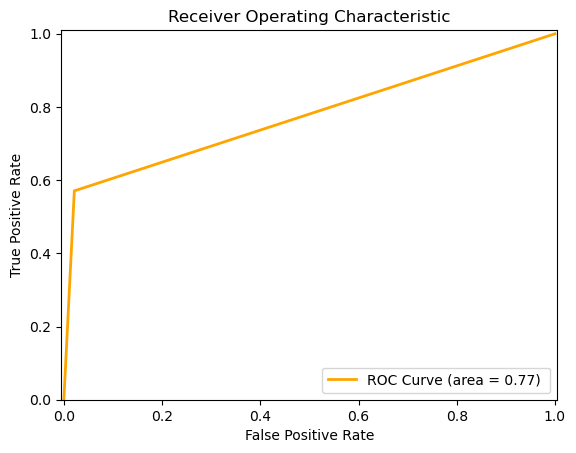

In [19]:
#Estimating the probability of Credit Card Fraud Label
decisiontree_prediction_probability_pca = ccfd_decisiontree_pca.predict_proba(X_Test_pca)

#Calculating true positive rate(tpr) and false positive rate(fpr)
dt_pca_fpr, dt_pca_tpr, pdt_pca_thresholds = metrics.roc_curve(y_test_balanced, decisiontree_prediction_probability_pca[:,1], pos_label=1)

#Calculating Area Under Curve
dt_pca_AUC = metrics.auc(dt_pca_fpr, dt_pca_tpr)
print("Area Under Curve for pca variant: ")
print(dt_pca_AUC)

#Plotting graph for ROC Curve
plt.figure()
plt.plot(dt_pca_fpr, dt_pca_tpr, color='orange', lw=2, label='ROC Curve (area = %0.2f) ' % dt_pca_AUC)

#Defining range of x and y axes
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

#Defining labels, title and legend for graph
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right');